當前工作目錄 ==> /home/jovyan/IGP-01-student
the python version is 3.7.10


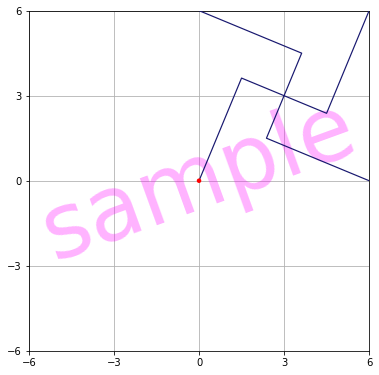

In [1]:
# (home)/IGP-01-student/
# IGP-01-2B
# 2021-09-27
#
# python 3.8.10
# run on replit.com
# run on mybinder.org
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is', python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString, Point
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(12, 12)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-6,-3,0,3,6]
yvalues = [-6,-3,0,3,6]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=10)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
ax.text(0.5, 0.5, 'sample', transform=ax.transAxes,
        fontsize=90, color='magenta', alpha=0.3,
        ha='center', va='center', rotation='20')
#
plt.savefig("./png/2B-00.png",format="png",dpi=150, facecolor='white')
#
cxy = (0,0)
r0 = 0.08
r1 = 3
cir_0 = shapely_Arc(cxy, r0,  0, 360)
cir_1 = shapely_Arc((r1,-r1), 2*r1,  0, 360)
motif_fill(cir_0, 'red',   60, 1.0)   
#
line_AC = LineString([(r1,-r1), (-r1, r1)])
line_BD = LineString([(r1, r1), (-r1,-r1)])
#
its_01 = line_AC.intersection(cir_1)
r2 = its_01.distance(Point(0,0))
cir_2 = shapely_Arc(cxy, r2,  0, 360)
#
cir_A = shapely_Arc(( r1,-r1), r2,  0, 360)
cir_B = shapely_Arc(( r1, r1), r2,  0, 360)
cir_C = shapely_Arc((-r1, r1), r2,  0, 360)
cir_D = shapely_Arc((-r1,-r1), r2,  0, 360)
#
its_02 = line_BD.intersection(cir_2)[0]
its_02_xy = (its_02.x, its_02.y)
cir_3 = shapely_Arc(its_02_xy, r0,  0, 360)
#
line_A_02 = LineString([(r1,-r1), its_02_xy])
p1_xy = ( r1-r2, r1)
p2_xy = (-r1+r2,-r1)
line_p1_p2 = LineString([p1_xy, p2_xy])
#
its_03 = line_p1_p2.intersection(line_A_02)
its_03_xy = (its_03.x, its_03.y)
cir_4 = shapely_Arc(its_03_xy, r0,  0, 360)
#
leg_1 = LineString([(r1,-r1), its_03_xy, cxy])
leg_2 = affinity.rotate(leg_1, 90, cxy)
leg_3 = affinity.rotate(leg_1,180, cxy)
leg_4 = affinity.rotate(leg_1,270, cxy)
#
RU_leg_1 = affinity.translate(leg_1, 3, 3, 0)
RU_leg_2 = affinity.translate(leg_2, 3, 3, 0)
RU_leg_3 = affinity.translate(leg_3, 3, 3, 0)
RU_leg_4 = affinity.translate(leg_4, 3, 3, 0)
#
motif_line(RU_leg_1, 'midnightblue', 10, 1.2)
motif_line(RU_leg_2, 'midnightblue', 10, 1.2)
motif_line(RU_leg_3, 'midnightblue', 10, 1.2)
motif_line(RU_leg_4, 'midnightblue', 10, 1.2)
#
plt.savefig("./png/2B-01.png",format="png",dpi=150, facecolor='white')
#
